In [1]:
from matplotlib import style
style.use('fivethirtyeight')

# Import dependencies
import pandas as pd
import numpy as np
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as sc
from matplotlib.colors import LinearSegmentedColormap

# ORM
import sqlalchemy
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base


In [2]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "postgres"
HOST = "localhost"
PORT = 5432
DATABASE = "crowdfunding_db"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [3]:
# Open a session
with Session(engine) as session:
    # Define a raw SQL query
    query = text("SELECT * FROM campaign WHERE outcome = 'successful' LIMIT 5;")
    result = session.execute(query)
    
    # Iterate over the results
    for row in result:
        print(row)

(1621, 3765, 'Odom Inc', 'Managed bottom-line architecture', 1400, 14560, 'successful', 158, 'US', 'USD', datetime.date(2021, 1, 25), datetime.date(2021, 5, 25), 'cat2', 'subcat2', datetime.datetime(2025, 1, 16, 21, 46, 22, 853162))
(1812, 4187, 'Melton, Robinson and Fritz', 'Function-based leadingedge pricing structure', 108400, 142523, 'successful', 1425, 'AU', 'AUD', datetime.date(2020, 12, 17), datetime.date(2021, 12, 30), 'cat3', 'subcat3', datetime.datetime(2025, 1, 16, 21, 46, 22, 853162))
(2057, 5650, 'Harris Group', 'Open-source optimizing database', 7600, 13195, 'successful', 174, 'DK', 'DKK', datetime.date(2020, 12, 11), datetime.date(2021, 8, 29), 'cat4', 'subcat4', datetime.datetime(2025, 1, 16, 21, 46, 22, 853162))
(2669, 4842, 'Carter-Guzman', 'Centralized cohesive challenge', 4500, 14741, 'successful', 227, 'DK', 'DKK', datetime.date(2020, 12, 22), datetime.date(2021, 9, 21), 'cat4', 'subcat4', datetime.datetime(2025, 1, 16, 21, 46, 22, 853162))
(2340, 3064, 'Green Ltd'

In [4]:
# Create Inspector Gadget
inspector = inspect(engine)

# Gather the names of the tables
tables = inspector.get_table_names()

#Go Go Gadget print column names
for table in tables:
    print(table)
    print("----------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print ()

category
----------
category_id VARCHAR(5)
category VARCHAR(20)
last_updated TIMESTAMP

subcategory
----------
subcategory_id VARCHAR(100)
sub-category VARCHAR(100)
last_updated TIMESTAMP

contacts
----------
first_name VARCHAR(20)
last_name VARCHAR(20)
email VARCHAR(100)
contact_id INTEGER
last-updated TIMESTAMP

campaign
----------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(100)
goal INTEGER
pledged INTEGER
outcome VARCHAR(15)
backers_count INTEGER
country VARCHAR(10)
currency VARCHAR(10)
launched_date DATE
end_date DATE
category_id VARCHAR(10)
subcategory_id VARCHAR(10)
last_updated TIMESTAMP



In [5]:
#Create dataframe comparing goal vs pledged amounts where the pledged amount is greater than the goal
query = text("""SELECT
                    cf_id,
                    company_name,
                    description,
                    goal,
                    pledged,
                    backers_count,
                    outcome
                FROM
                    campaign
                WHERE
                    pledged >= goal""")
df = pd.read_sql(query, con=engine)
df

,cf_id,company_name,description,goal,pledged,backers_count,outcome
0,1621,Odom Inc,Managed bottom-line architecture,1400,14560,158,successful
1,1812,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,1425,successful
2,2057,Harris Group,Open-source optimizing database,7600,13195,174,successful
3,2669,Carter-Guzman,Centralized cohesive challenge,4500,14741,227,successful
4,2340,Green Ltd,Monitored empowering installation,5200,13838,220,successful
...,...,...,...,...,...,...,...
560,3184,Wilson Group,Ameliorated foreground focus group,6200,13441,480,successful
561,2585,Hernandez Inc,Versatile dedicated migration,2400,11990,226,successful
562,2632,Ramirez LLC,Reduced reciprocal focus group,9800,11091,241,successful
563,439,Morrow Inc,Networked global migration,3100,13223,132,successful


In [6]:
successful = df[df["outcome"] == "successful"].shape[0]
print(successful)

565


In [7]:
# Join the category table to the campaign table
query = """
SELECT
    campaign.cf_id,
    campaign.contact_id,
    campaign.company_name,
    campaign.description,
    campaign.goal,
    campaign.pledged,
    campaign.outcome,
    campaign.backers_count,
    campaign.country,
    campaign.currency,
    campaign.launched_date,
    campaign.end_date,
    campaign.category_id AS campaign_category_id,
    campaign.subcategory_id,
    campaign.last_updated,
    category.category_id AS category_table_category_id,
    category.category AS category_name
FROM
    campaign
LEFT JOIN
    category
    ON campaign.category_id = category.category_id;
"""
# Execute the query and save the results to a DataFrame
df1 = pd.read_sql(query, con=engine)
df1.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,campaign_category_id,subcategory_id,last_updated,category_table_category_id,category_name
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,2025-01-16 21:46:22.853162,cat1,food
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,2025-01-16 21:46:22.853162,cat2,music
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3,2025-01-16 21:46:22.853162,cat3,technology
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,2025-01-16 21:46:22.853162,cat2,music
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4,2025-01-16 21:46:22.853162,cat4,theater


In [8]:
df1.sort_values(by="pledged", ascending=False, inplace=True)
df1

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,campaign_category_id,subcategory_id,last_updated,category_table_category_id,category_name
208,225,3411,Jackson Inc,Mandatory multi-tasking encryption,196900,199110,successful,2053,US,USD,2020-12-07,2021-08-21,cat5,subcat5,2025-01-16 21:46:22.853162,cat5,film & video
335,3176,1791,Jordan-Acosta,Operative uniform hub,173800,198628,successful,2283,US,USD,2020-02-27,2021-02-12,cat2,subcat2,2025-01-16 21:46:22.853162,cat2,music
703,195,3041,Perez Group,Cross-platform tertiary hub,63400,197728,successful,2038,US,USD,2021-05-01,2021-11-03,cat6,subcat19,2025-01-16 21:46:22.853162,cat6,publishing
487,3172,3903,Smith-Wallace,Monitored 24/7 time-frame,110300,197024,successful,2346,US,USD,2021-02-13,2021-09-15,cat4,subcat4,2025-01-16 21:46:22.853162,cat4,theater
427,2523,3181,"Hicks, Wall and Webb",Managed discrete framework,174500,197018,successful,2526,US,USD,2020-04-08,2021-04-15,cat4,subcat4,2025-01-16 21:46:22.853162,cat4,theater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2588,3229,"Brown, Palmer and Pace",Networked stable workforce,100,1,failed,1,US,USD,2021-01-21,2021-07-11,cat2,subcat2,2025-01-16 21:46:22.853162,cat2,music
850,1719,3329,"Hood, Perez and Meadows",Cross-group upward-trending hierarchy,100,1,failed,1,US,USD,2020-04-04,2021-03-11,cat2,subcat2,2025-01-16 21:46:22.853162,cat2,music
750,985,2184,Ramos and Sons,Extended responsive Internet solution,100,1,failed,1,GB,GBP,2021-06-11,2021-06-28,cat2,subcat6,2025-01-16 21:46:22.853162,cat2,music
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,2025-01-16 21:46:22.853162,cat1,food


In [9]:
df1.outcome.unique()

array(['successful', 'failed', 'live', 'canceled'], dtype=object)

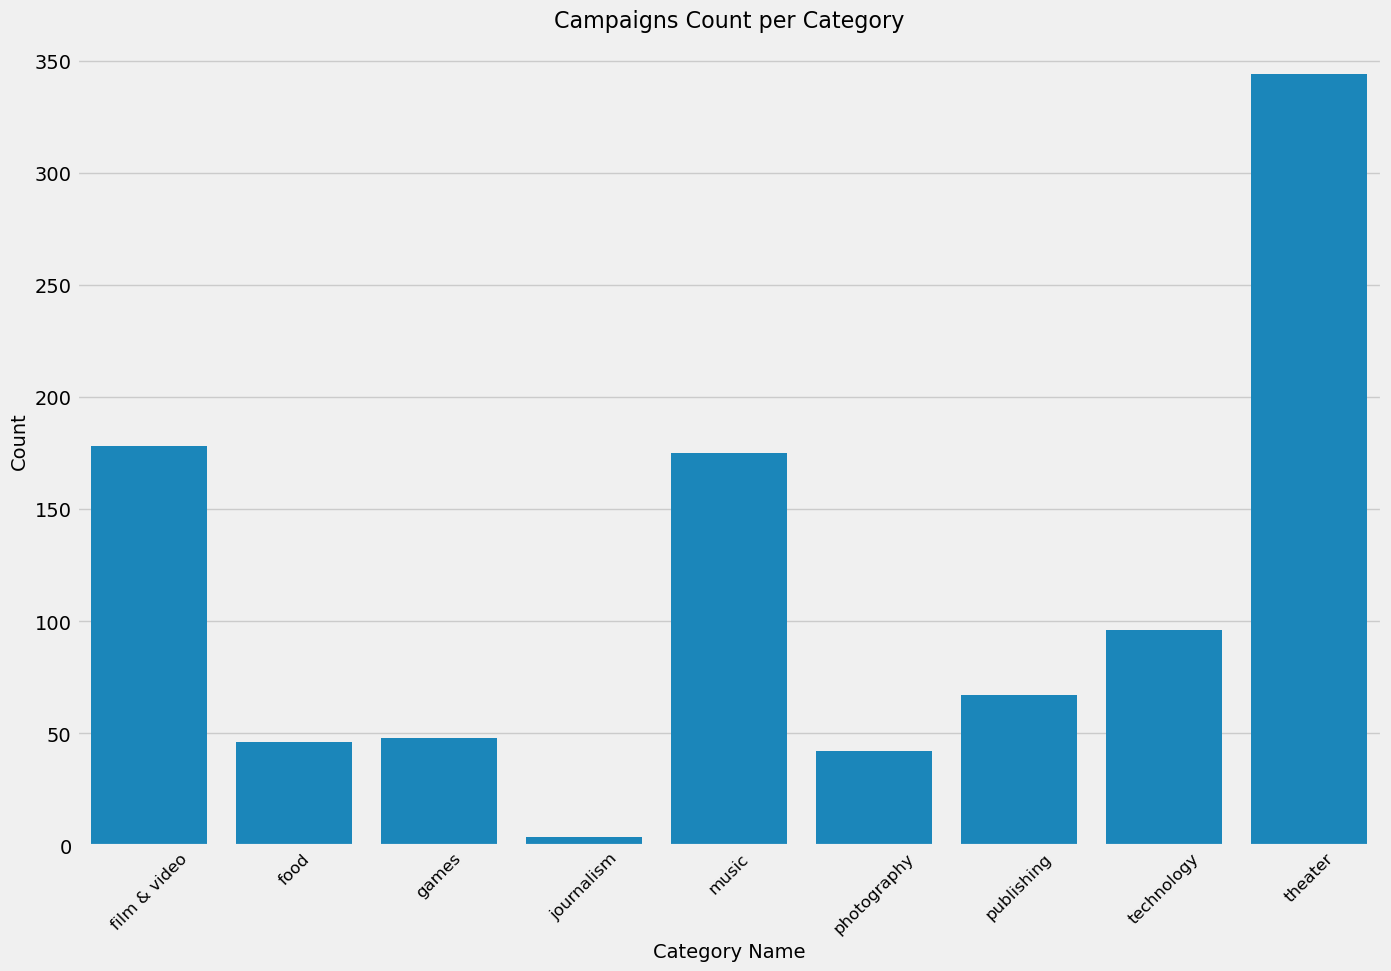

In [10]:
#Plot number of campaigns per category
category_count=df1.groupby("category_name").size().reset_index(name="count")

plt.figure(figsize=(15, 10))
sns.barplot(
    data=category_count,
    x="category_name",
    y="count",
)

plt.title("Campaigns Count per Category", fontsize=16)
plt.xlabel("Category Name", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.show()

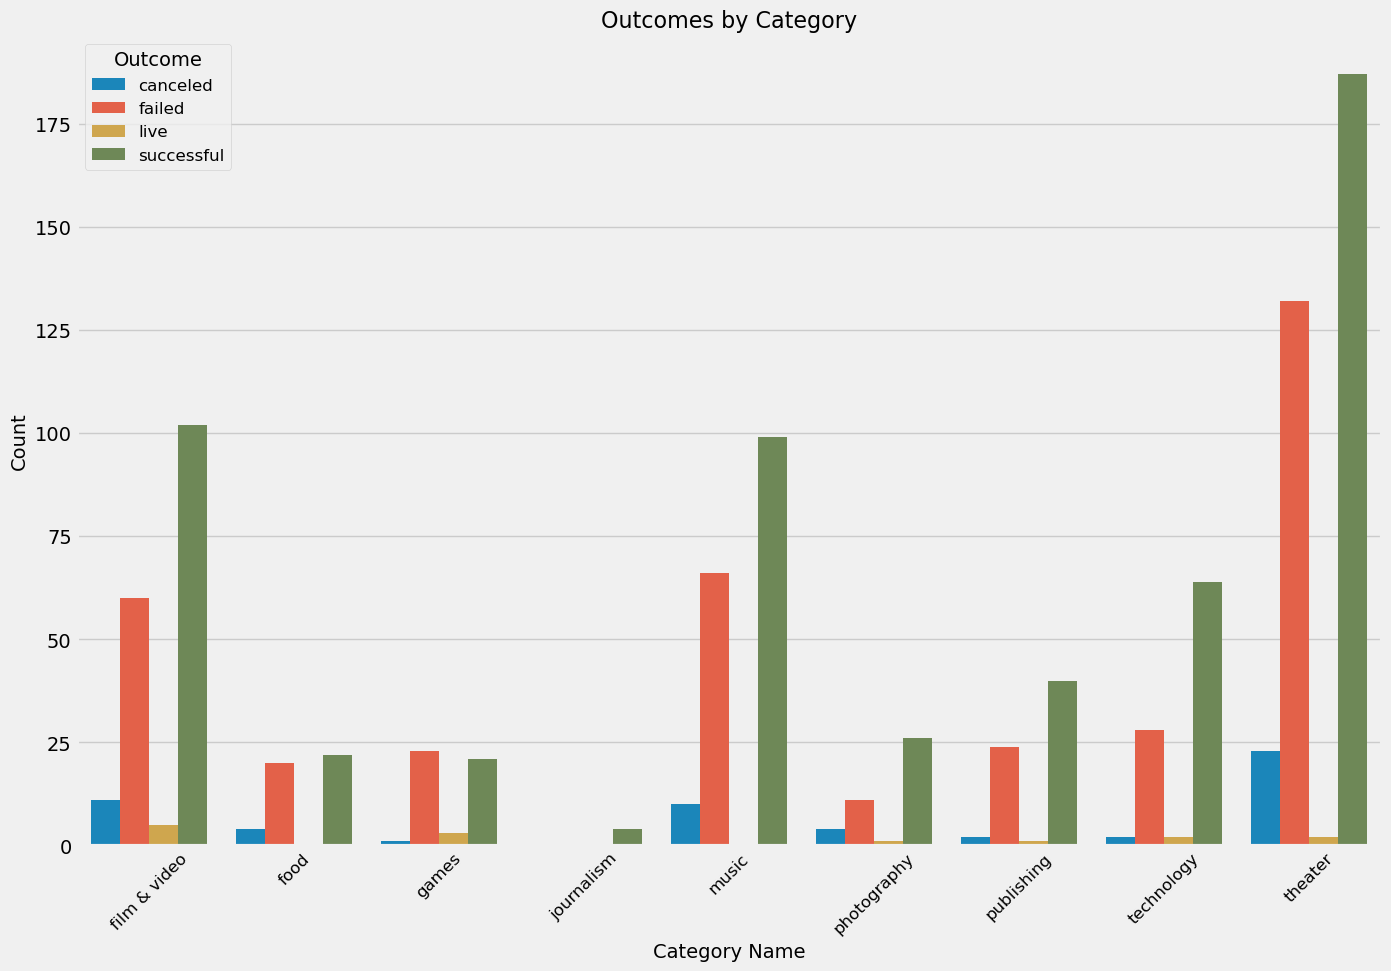

In [11]:
#Plot outcomes by category
outcome_category =df1.groupby(["category_name", "outcome"]).size().reset_index(name="count")

plt.figure(figsize=(15, 10))
sns.barplot(
    data=outcome_category,
    x="category_name",
    y="count",
    hue="outcome",
    dodge=True
)

plt.title("Outcomes by Category", fontsize=16)
plt.xlabel("Category Name", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Outcome", fontsize=12)
plt.xticks(rotation=45, fontsize=12)

plt.show()

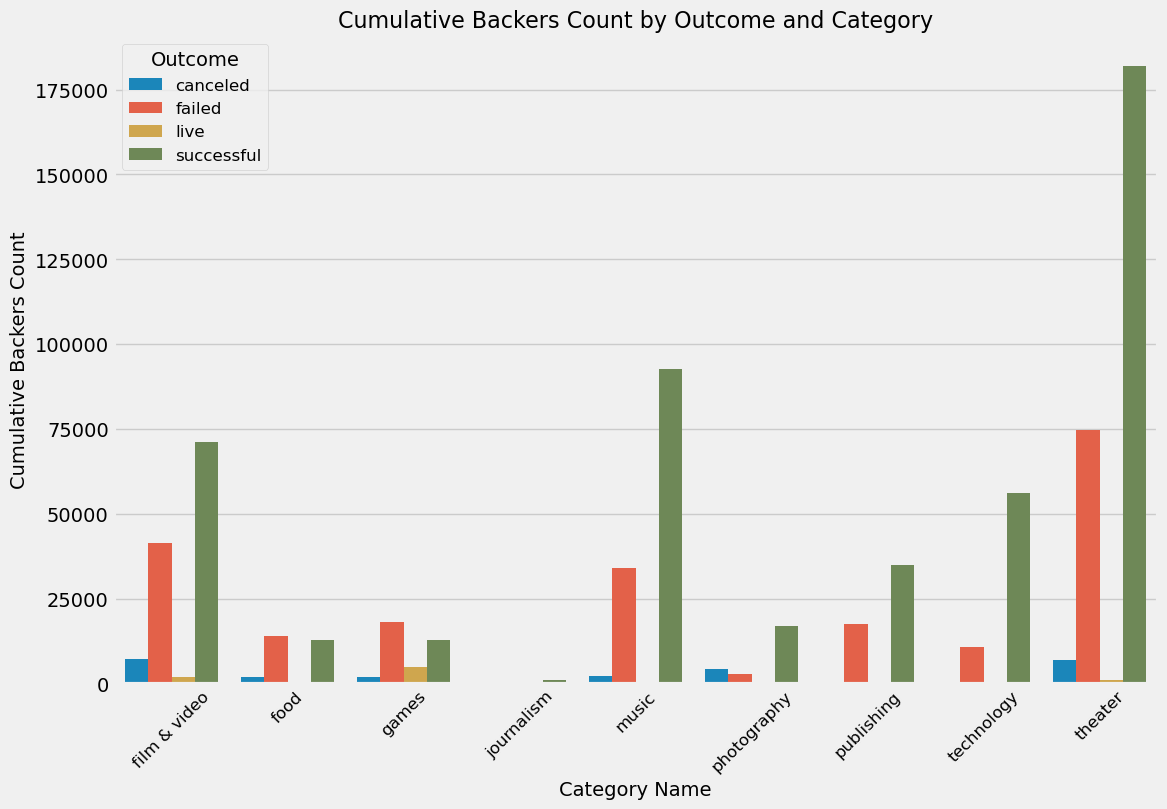

In [12]:
# Aggregate backers count for each category and outcome
backers_data = (
    df1.groupby(['category_name', 'outcome'])['backers_count']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=backers_data,
    x='category_name',
    y='backers_count', 
    hue='outcome',
)

# Customize
plt.title('Cumulative Backers Count by Outcome and Category', fontsize=16)
plt.xlabel('Category Name', fontsize=14)
plt.ylabel('Cumulative Backers Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Outcome', fontsize=12)

# Show the plot
plt.show()

In [13]:
# Define the query
query = """
SELECT 
    backers_count, 
    pledged, 
    goal, 
    CASE 
        WHEN pledged >= goal THEN 'successful'
        ELSE 'failed'
    END AS success
FROM campaign;
"""

# Execute the query and save results to a DataFrame
df2 = pd.read_sql(query, con=engine)

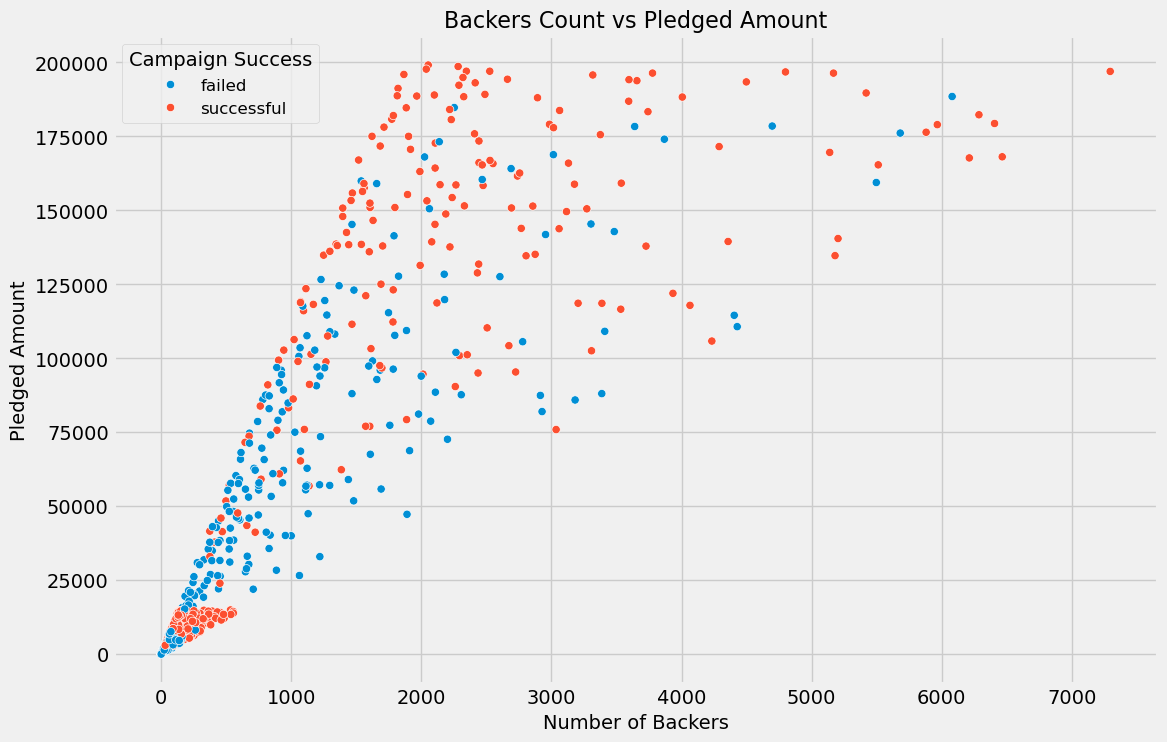

In [14]:
# Backers_count vs. pledged, color by success
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df2,
    x='backers_count',
    y='pledged',
    hue='success'
)

# Customize the plot
plt.title('Backers Count vs Pledged Amount', fontsize=16)
plt.xlabel('Number of Backers', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)
plt.legend(title='Campaign Success', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [15]:
# Outlier Elimination

# Calculate the first (Q1) and third (Q3) quartiles for 'backers_count' and 'pledged'
Q1_backers = df2['backers_count'].quantile(0.25)
Q3_backers = df2['backers_count'].quantile(0.75)
IQR_backers = Q3_backers - Q1_backers

Q1_pledged = df2['pledged'].quantile(0.25)
Q3_pledged = df2['pledged'].quantile(0.75)
IQR_pledged = Q3_pledged - Q1_pledged

# Define the lower and upper bounds
lower_bound_backers = Q1_backers - 1.5 * IQR_backers
upper_bound_backers = Q3_backers + 1.5 * IQR_backers

lower_bound_pledged = Q1_pledged - 1.5 * IQR_pledged
upper_bound_pledged = Q3_pledged + 1.5 * IQR_pledged

# Filter out rows
df2 = df2[
    (df2['backers_count'] >= lower_bound_backers) & (df2['backers_count'] <= upper_bound_backers) &
    (df2['pledged'] >= lower_bound_pledged) & (df2['pledged'] <= upper_bound_pledged)
]

# Check the shape of the updated DataFrame
df2.shape

(866, 4)

y = 78.11x + -1940.22
R-squared: 0.89
P-value: 3.79e-220


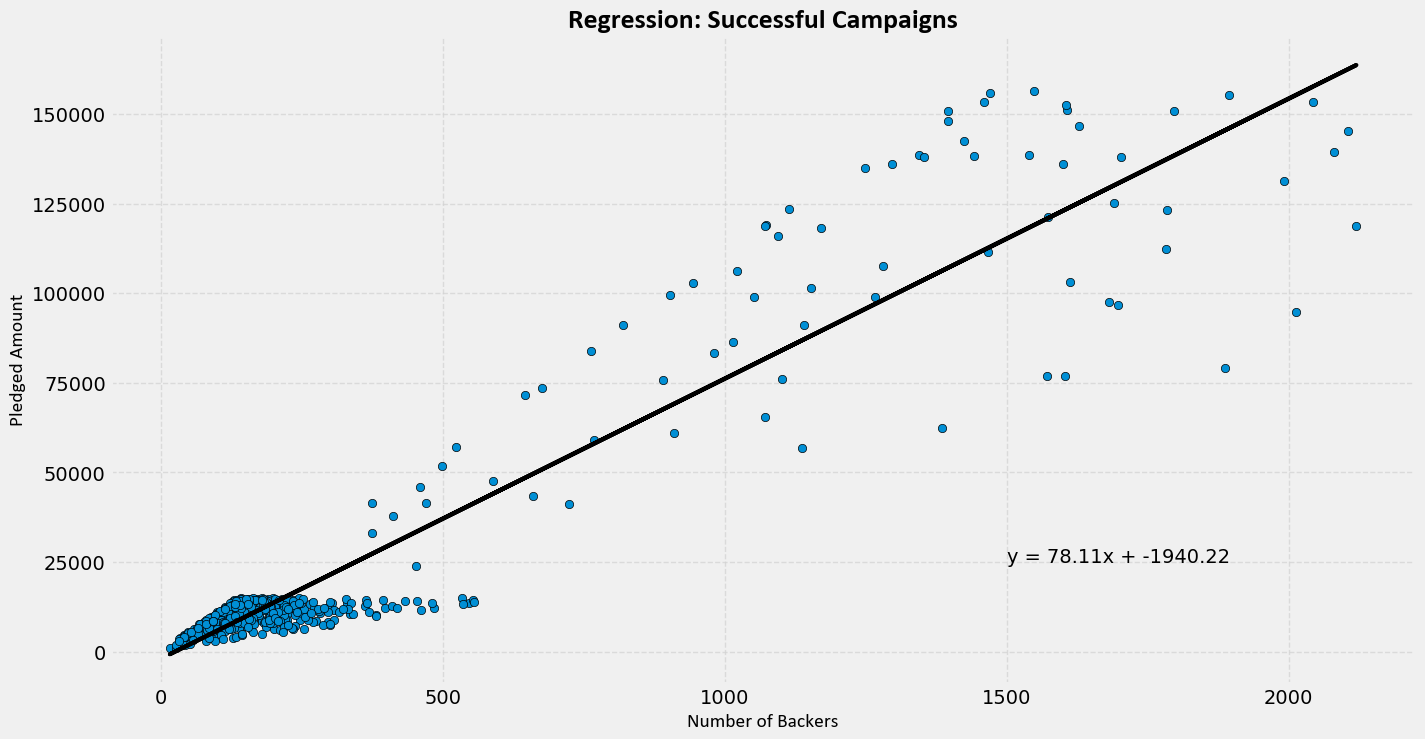

In [16]:
# Regression for successful campaigns
successful_df = df2[df2['pledged'] >= df2['goal']]
x_values = successful_df['backers_count']
y_values = successful_df['pledged']
(slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)

# Generate values
values = x_values * slope + intercept
line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Print stats
print(line)
print(f"R-squared: {rvalue**2:.2f}")
print(f"P-value: {pvalue:.2e}")

# Plot
plt.figure(figsize=(15, 8))
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, values, color='black', linewidth=3)
plt.xlabel("Number of Backers", fontfamily='Calibri', fontsize=14)
plt.ylabel("Pledged Amount", fontfamily='Calibri', fontsize=14)
plt.title("Regression: Successful Campaigns", fontweight="bold", fontfamily='Calibri', fontsize=20)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.annotate(line, (1500, 25000), fontsize=14, color="black")
plt.show()

y = 61.55x + 2318.23
R-squared: 0.83
P-value: 8.46e-160


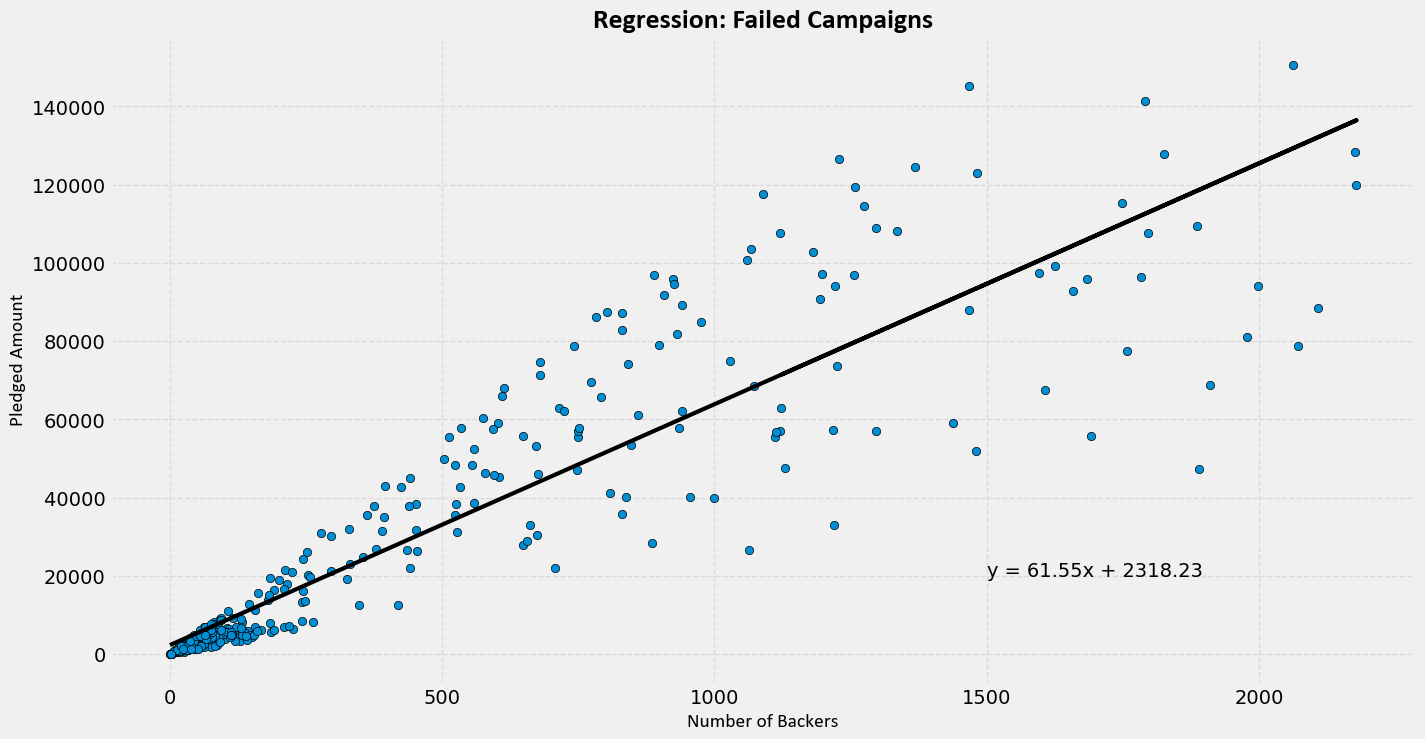

In [17]:
# Perform regression for failed campaigns
failed_df = df2[df2['pledged'] < df2['goal']]
x_values = failed_df['backers_count']
y_values = failed_df['pledged']
(slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)

# Generate regression values
values = x_values * slope + intercept
line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Print regression stats
print(line)
print(f"R-squared: {rvalue**2:.2f}")
print(f"P-value: {pvalue:.2e}")

# Plot failed campaigns
plt.figure(figsize=(15, 8))
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, values, color='black', linewidth=3)
plt.xlabel("Number of Backers", fontfamily='Calibri', fontsize=14)
plt.ylabel("Pledged Amount", fontfamily='Calibri', fontsize=14)
plt.title("Regression: Failed Campaigns", fontweight="bold", fontfamily='Calibri', fontsize=20)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.annotate(line, (1500, 20000), fontsize=14, color="black")
plt.show()

In [18]:
# Campaigns by country

In [19]:
#Use SQL to query data for new dataframe
query = """
SELECT
    campaign.cf_id,
    campaign.company_name,
    campaign.description,
    campaign.goal,
    campaign.pledged,
    campaign.outcome,
    campaign.country
FROM
    campaign;
"""
# Execute the query and save the results to a DataFrame
df3 = pd.read_sql(query, con=engine)
df3.head()

,cf_id,company_name,description,goal,pledged,outcome,country
0,147,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,CA
1,1621,Odom Inc,Managed bottom-line architecture,1400,14560,successful,US
2,1812,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,AU
3,2156,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,US
4,1365,Larson-Little,Proactive foreground core,7600,5265,failed,US


In [20]:
df3['country'].unique()

array(['CA', 'US', 'AU', 'DK', 'GB', 'CH', 'IT'], dtype=object)

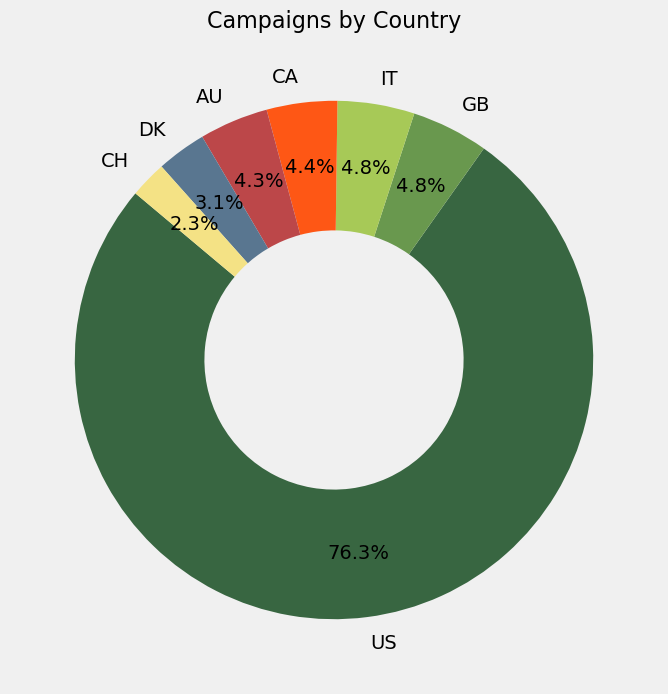

In [21]:
# Create a donut chart showing the distro of campaigns by country
country_count = df3['country'].value_counts()

labels = country_count.index
sizes = country_count.values

# Define the color palette
coolors_palette = ["#386641", "#6a994e", "#a7c957", "#ff5714", "#bc4749", "#577590", "#f4e285"]

# Create a custom colormap from the Coolors palette
cmap = LinearSegmentedColormap.from_list("coolors_gradient", coolors_palette, N=256)

gradient_colors = cmap(np.linspace(0, 1, 7))

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.5),
    colors=gradient_colors,
    pctdistance=0.75
)

# Add a title
plt.title("Campaigns by Country", fontsize=16) 

# Show the chart
plt.show()

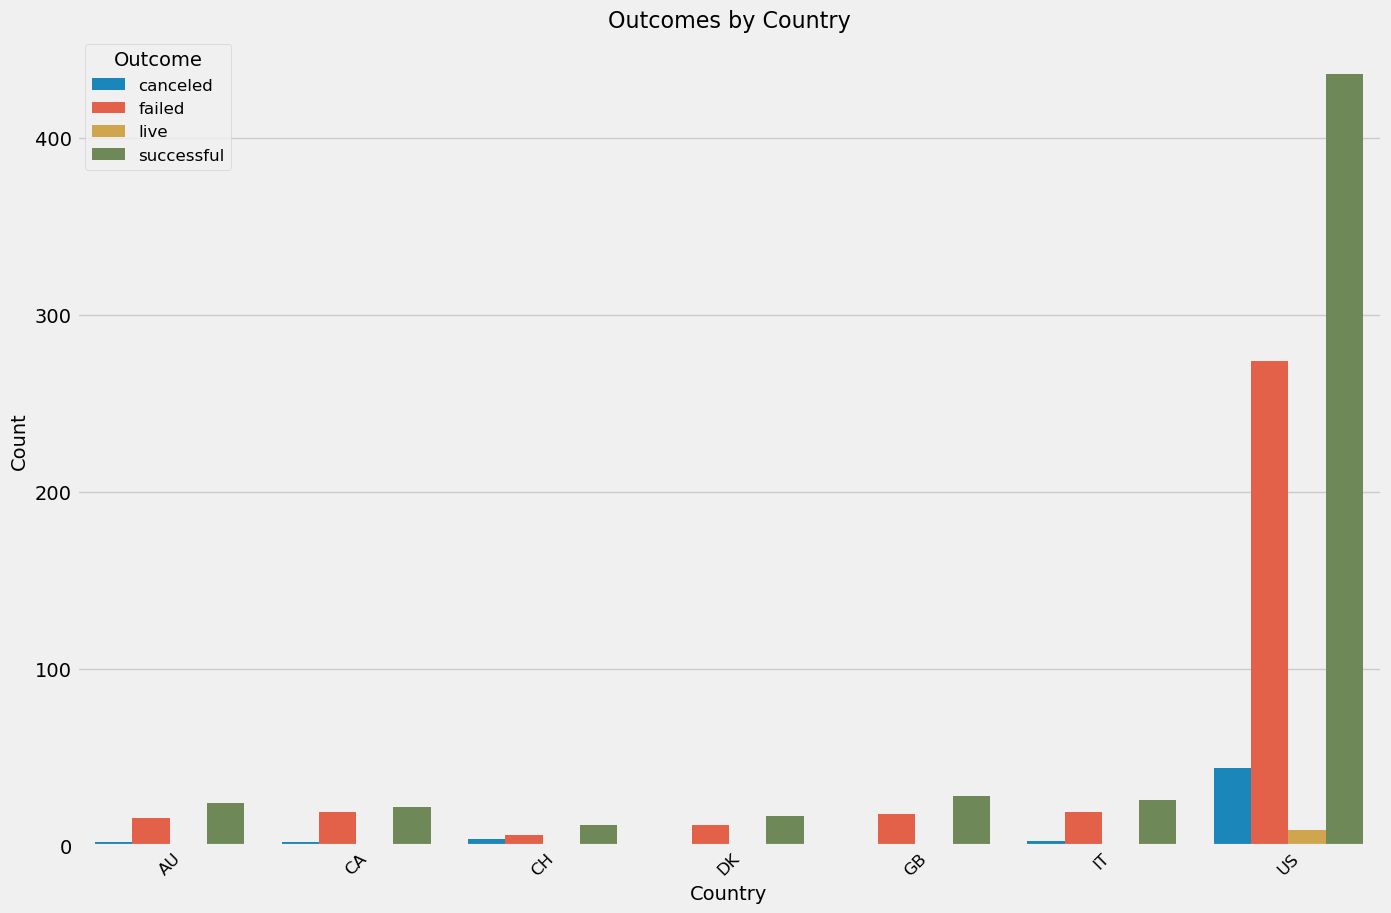

In [22]:
# Outcome by Country
outcome_country = df3.groupby(["country", "outcome"]).size().reset_index(name="count")

plt.figure(figsize=(15, 10))
sns.barplot(
    data=outcome_country,
    x="country",
    y="count",
    hue="outcome",
    dodge=True
)

plt.title("Outcomes by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Outcome", fontsize=12)
plt.xticks(rotation=45, fontsize=12)

plt.show()

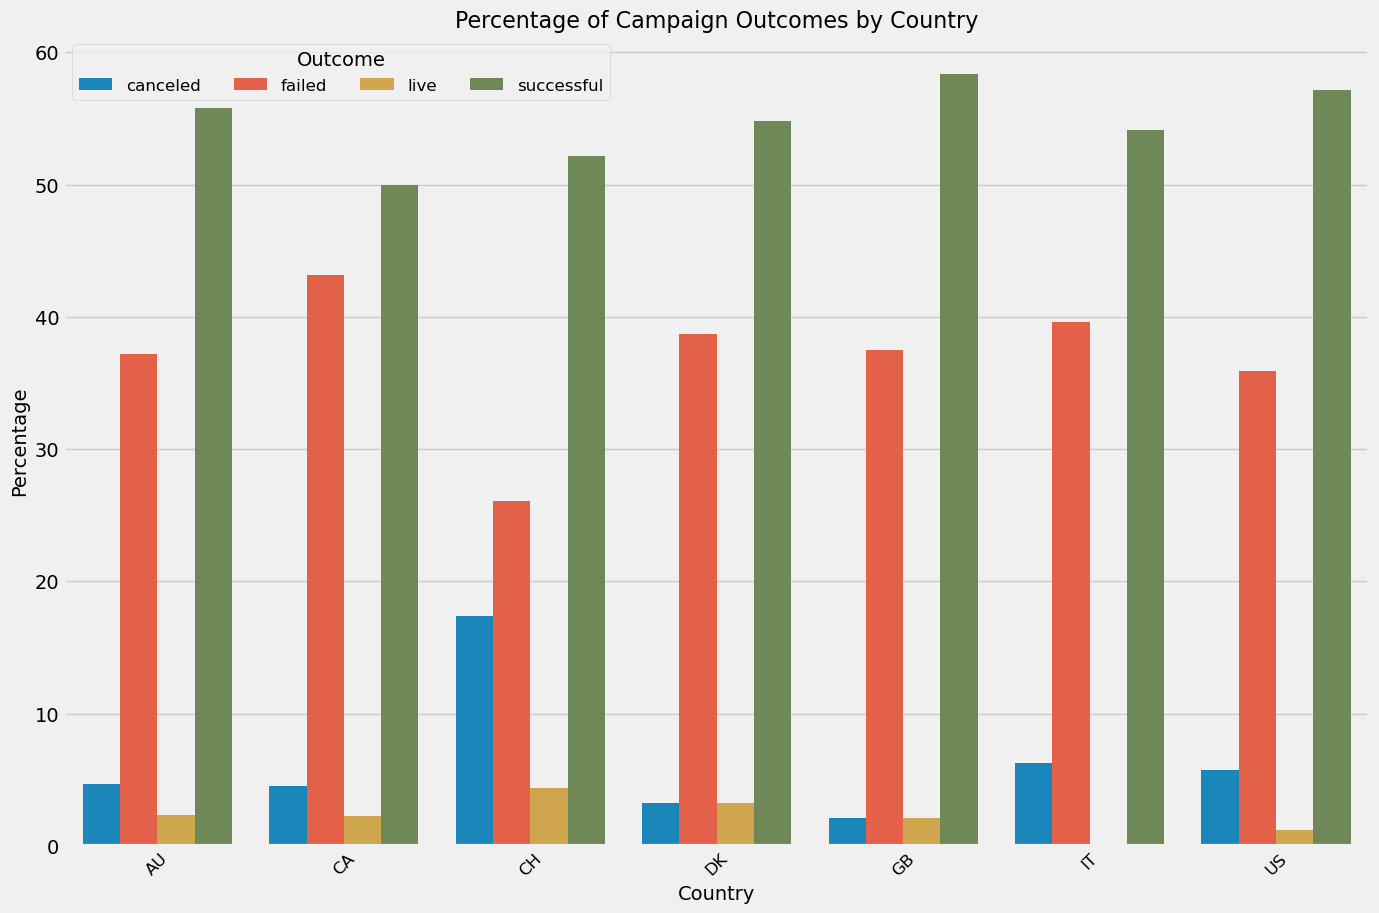

In [23]:
# Modify for percentages
outcome_country = df3.groupby(["country", "outcome"]).size().reset_index(name="count")

# Calculate percentages
total_by_country = outcome_country.groupby("country")["count"].transform("sum")
outcome_country["percentage"] = (outcome_country["count"] / total_by_country) * 100

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(
    data=outcome_country,
    x="country",
    y="percentage",
    hue="outcome",
    dodge=True
)

plt.title("Percentage of Campaign Outcomes by Country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.legend(title="Outcome", fontsize=12, ncol=outcome_country['outcome'].nunique(), loc='upper left')
plt.xticks(rotation=45, fontsize=12)

plt.show()

In [24]:
#SQL query for percentage of successful cmapagins by country
query = """
SELECT 
    country,
    COUNT(CASE WHEN outcome = 'successful' THEN 1 END) AS successful_count,
    COUNT(*) AS total_campaigns,
    ROUND(
        (COUNT(CASE WHEN outcome = 'successful' THEN 1 END) * 100.0 / COUNT(*)),
        2
    ) AS success_rate
FROM 
    campaign
GROUP BY 
    country
ORDER BY 
    success_rate DESC;
"""

# Execute the query and save the results to a DataFrame
df4 = pd.read_sql(query, con=engine)

# Display the results
df4

,country,successful_count,total_campaigns,success_rate
0,GB,28,48,58.33
1,US,436,763,57.14
2,AU,24,43,55.81
3,DK,17,31,54.84
4,IT,26,48,54.17
5,CH,12,23,52.17
6,CA,22,44,50.00


In [25]:
#SQL query for percentage of failed cmapagins by country
query = """
SELECT 
    country,
    COUNT(CASE WHEN outcome = 'failed' THEN 1 END) AS failed_count,
    COUNT(*) AS total_campaigns,
    ROUND(
        (COUNT(CASE WHEN outcome = 'failed' THEN 1 END) * 100.0 / COUNT(*)),
        2
    ) AS failed_rate
FROM 
    campaign
GROUP BY 
    country
ORDER BY 
    failed_rate DESC;
"""

# Execute the query and save the results to a DataFrame
df4 = pd.read_sql(query, con=engine)

# Display the results
df4

,country,failed_count,total_campaigns,failed_rate
0,CA,19,44,43.18
1,IT,19,48,39.58
2,DK,12,31,38.71
3,GB,18,48,37.50
4,AU,16,43,37.21
5,US,274,763,35.91
6,CH,6,23,26.09


In [26]:
#SQL query for percentage of canceled campaigns by country
query = """
SELECT 
    country,
    COUNT(CASE WHEN outcome = 'canceled' THEN 1 END) AS canceled_count,
    COUNT(*) AS total_campaigns,
    ROUND(
        (COUNT(CASE WHEN outcome = 'canceled' THEN 1 END) * 100.0 / COUNT(*)),
        2
    ) AS canceled_rate
FROM 
    campaign
GROUP BY 
    country
ORDER BY 
    canceled_rate DESC;
"""

# Execute the query and save the results to a DataFrame
df4 = pd.read_sql(query, con=engine)

# Display the results
df4

,country,canceled_count,total_campaigns,canceled_rate
0,CH,4,23,17.39
1,IT,3,48,6.25
2,US,44,763,5.77
3,AU,2,43,4.65
4,CA,2,44,4.55
5,DK,1,31,3.23
6,GB,1,48,2.08


In [27]:
#SQL query for percentage of live campaigns by country
query = """
SELECT 
    country,
    COUNT(CASE WHEN outcome = 'live' THEN 1 END) AS live_count,
    COUNT(*) AS total_campaigns,
    ROUND(
        (COUNT(CASE WHEN outcome = 'live' THEN 1 END) * 100.0 / COUNT(*)),
        2
    ) AS live_rate
FROM 
    campaign
GROUP BY 
    country
ORDER BY 
    live_rate DESC;
"""

# Execute the query and save the results to a DataFrame
df4 = pd.read_sql(query, con=engine)

# Display the results
df4

,country,live_count,total_campaigns,live_rate
0,CH,1,23,4.35
1,DK,1,31,3.23
2,AU,1,43,2.33
3,CA,1,44,2.27
4,GB,1,48,2.08
5,US,9,763,1.18
6,IT,0,48,0.00


In [55]:
session.close()

In [ ]:
engine.dispose()